<a href="https://colab.research.google.com/github/douglasbarbosadelima/Data-Science/blob/master/Ann_carro_custo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes neurais para avaliação do consumo do carro

In [0]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [29]:
df=pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
y=df['name']
df=df.dropna()
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 405
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null int64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null int64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 30.6+ KB


In [0]:
df=df.drop(labels=['name'],axis=1)
y=df['mpg']
df=df.drop(labels=['mpg'],axis=1)

In [0]:
scaler = StandardScaler()
scaler.fit(df)
X=scaler.transform(df)


Estime o erro médio quadrático na amostra de treinamento toda com 10 perceptrons random_state=42

In [32]:
ann_car = MLPRegressor(hidden_layer_sizes=(10,), random_state=42, max_iter=50000)
ann_car.fit(X, y)
ye = ann_car.predict(X)

mean_squared_error(ye, y)

6.054650498706597

 Obtenha o número de perceptrons (2,10,50,100,200 ou 500) na hidden layer que minimize o erro em split 30%. Faça gráfico.

In [0]:
lh = [2, 10, 50, 100, 200, 500]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
le = []
le_train = []
for n in lh:
  ann_car = MLPRegressor(hidden_layer_sizes=(n,), random_state=42, max_iter=5000)
  ann_car.fit(X_train, y_train)
  ye = ann_car.predict(X_test)
  le.append(mean_squared_error(ye, y_test))
  yet = ann_car.predict(X_train)
  le_train.append(mean_squared_error(yet, y_train))

  le, le_train

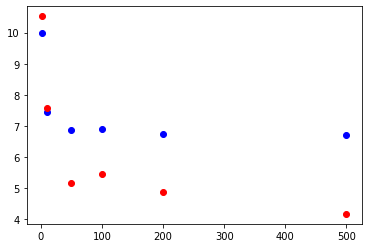

In [40]:
plt.plot(lh, le, 'bo')
plt.plot(lh, le_train, 'ro')
plt.show()

Agora é com você. Tente um erro nos testes menor que o atual.....mexer nas features? Avaliar relevância delas?